In [1]:
import imageio
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus as pdp
import seaborn as sbn
import os

from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [2]:
# Cấu hình đường dẫn
folder = "../"
output_dir = folder + "Output"

# Tạo thư mục nếu chưa có
os.makedirs(output_dir, exist_ok=True)

In [3]:
# Đọc dữ liệu
data = pd.read_excel(folder + '../Data/Iris.xls')
print(data.head())
print("=========================================================")
print(data.info())

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# Chuẩn bị dữ liệu
x = data.drop('iris', axis=1)
print(x.head())

print("=======================================================")

y = data.iris
print(y.head())

print("=======================================================")

print("Các nhãn (classes):", y.unique())

   sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object
Các nhãn (classes): ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
# Chia train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
print(f"Train: {x_train.shape}, Test: {x_test.shape}")

Train: (120, 4), Test: (30, 4)


In [10]:
# Xây dựng mô hình Decision Tree (giữ tham số mặc định)
clf = DecisionTreeClassifier()
model = clf.fit(x_train, y_train)

# Lưu mô hình
mdl_path = os.path.join(output_dir, 'DecisionTree_Iris.mdl')
jlb.dump(model, mdl_path)
print(f"Đã lưu mô hình: {mdl_path}")

Đã lưu mô hình: ../Output\DecisionTree_Iris.mdl


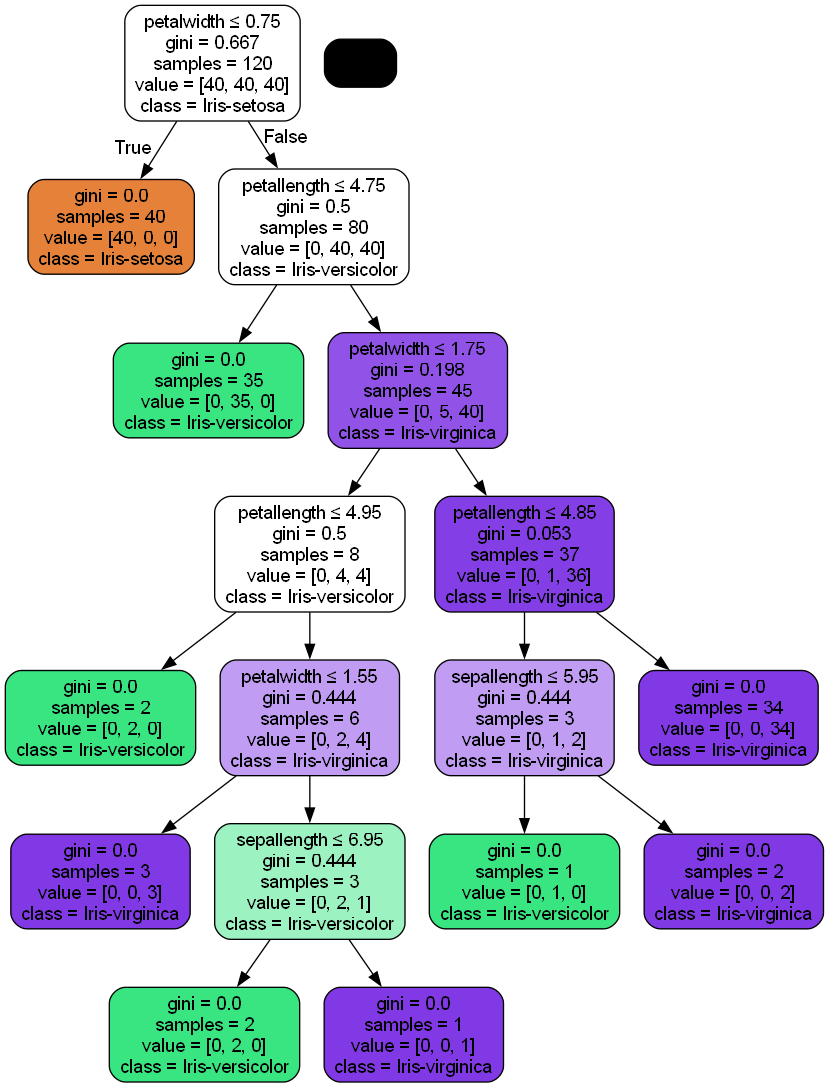

In [7]:
# ----------------------------------------------------------
# 5. Xuất & hiển thị cây quyết định (graphviz + pydotplus)
# ----------------------------------------------------------
dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=x.columns,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pdp.graph_from_dot_data(dot_data)

png_path = os.path.join(output_dir, "DecisionTree_Iris.png")
pdf_path = os.path.join(output_dir, "DecisionTree_Iris.pdf")

# ghi file
graph.write_png(png_path)
graph.write_pdf(pdf_path)

# (Tùy môi trường, Image(...) có thể hiển thị trong notebook)
try:
    display(Image(graph.create_png()))
except Exception:
    print(f"Đã xuất cây xuống: {png_path} và {pdf_path}")


=== 🔍 ĐÁNH GIÁ MÔ HÌNH Decision Tree (Iris) ===
Accuracy            : 96.67%
Precision (macro)   : 96.97%
Recall (macro)      : 96.67%
F1-score (macro)    : 96.66%

=== 📊 Báo cáo chi tiết ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Ma trận nhầm lẫn:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


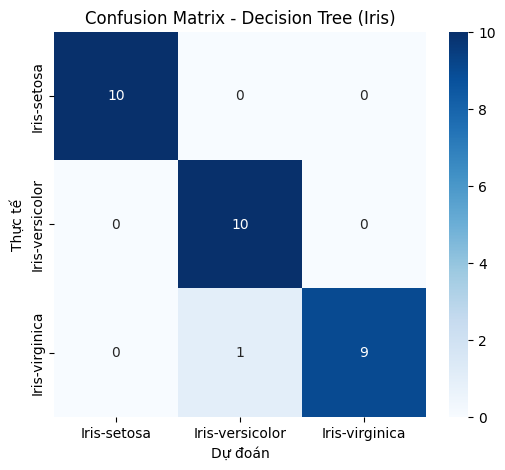

In [8]:
# ----------------------------------------------------------
# 6. Dự đoán trên tập test và đánh giá (giống KNN trước đó)
# ----------------------------------------------------------
y_pred = model.predict(x_test)

# Các chỉ số chung (dùng average='macro' cho đa lớp)
scores = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
    'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
    'F1-score (macro)': f1_score(y_test, y_pred, average='macro')
}

print("\n=== 🔍 ĐÁNH GIÁ MÔ HÌNH Decision Tree (Iris) ===")
for name, val in scores.items():
    print(f"{name:20s}: {val*100:.2f}%")

print("\n=== 📊 Báo cáo chi tiết ===")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("\nMa trận nhầm lẫn:\n", cm)

plt.figure(figsize=(6,5))
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Decision Tree (Iris)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()



Feature importances:
 petalwidth     0.553453
petallength    0.413213
sepallength    0.033333
sepalwidth     0.000000
dtype: float64


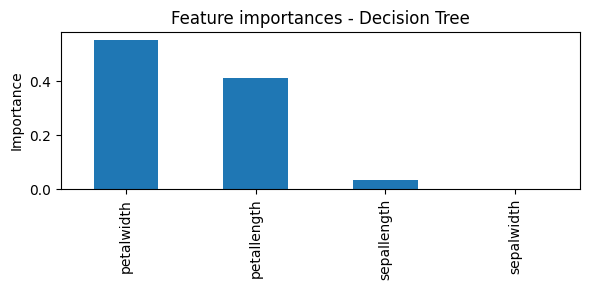

In [ ]:
# Feature Importances
fi = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
print("\nFeature importances:\n", fi)

plt.figure(figsize=(6,3))
fi.plot(kind='bar')
plt.title('Feature importances - Decision Tree')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

C:\Users\Phu\AppData\Local\Temp\ipykernel_18252\241549063.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  photo = imageio.imread(png_path)


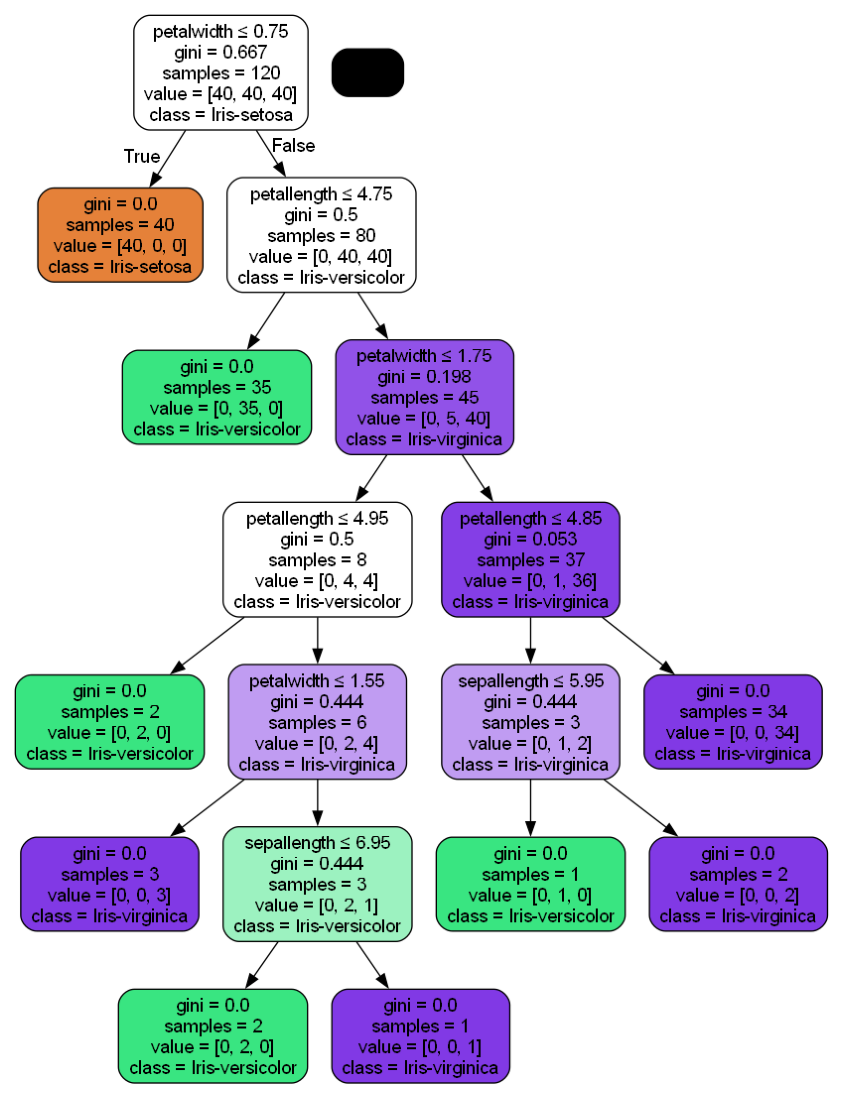

In [10]:
# Hiển thị ảnh cây (nếu file được tạo) để đảm bảo có output
if os.path.exists(png_path):
    photo = imageio.imread(png_path)
    plt.figure(figsize=(14,14))
    plt.imshow(photo)
    plt.axis('off')
    plt.show()

In [11]:
# ----------------------------------------------------------
# 9. Vòng lặp tương tác dự đoán mẫu đơn lẻ (giữ giao diện giống ban đầu)
# ----------------------------------------------------------
labels = np.unique(y)  # ['Iris-setosa', ...]
model_load = jlb.load(mdl_path)

tiep = 'C'
while (tiep.upper() == 'C'):
    try:
        idx = int(input(f'Nhập chỉ số dòng từ 0 đến {len(x_test)-1} (hoặc -1 để thoát): '))
        if idx == -1:
            break
        idx = idx % len(x_test)
        X_new = x_test.iloc[[idx]]
        y_pred_single = model_load.predict(X_new)
        print('Mẫu', X_new.to_string(), '    được dự đoán là', y_pred_single)
    except Exception as ex:
        print("Lỗi nhập liệu hoặc ngoại lệ:", ex)
    tiep = input('Tiếp tục (C/K) ? ')

Mẫu     sepallength  sepalwidth  petallength  petalwidth
11          4.8         3.4          1.6         0.2     được dự đoán là ['Iris-setosa']
